In [ ]:
from rotor_model import model_fit, convert_rpm_to_scaled_radians, execute_model
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

df = pd.read_csv("final_dataset.csv")
sub_df = df[['delta_zeta', 'RPM1', 'RPM2', 'RPM3', 'RPM4', 'C_proc', 'Lw_Ref', 'Lws[dB]']].copy()
sub_df = sub_df.rename(columns={"Lws[dB]": "Lws"})

In [6]:
sub_df

,delta_zeta,RPM1,RPM2,RPM3,RPM4,C_proc,Lw_Ref,Lws
0,0.000000,2903.363636,2618.000000,2494.363636,2827.727273,0.000000,"[58.06334401065169, 63.39435536470416, 89.6140...","[48.64300983673778, 65.01242522683135, 88.8740..."
1,0.000000,2939.000000,2631.000000,2524.692308,2821.538462,0.000000,"[58.06334401065169, 63.39435536470416, 89.6140...","[63.532159255691944, 70.69054519292442, 90.900..."
2,0.000000,2913.230769,2649.769231,2546.923077,2796.846154,0.000000,"[58.06334401065169, 63.39435536470416, 89.6140...","[55.654835278872135, 55.8704568386677, 95.2124..."
3,0.000000,2890.000000,2667.923077,2567.461538,2785.769231,0.000000,"[58.06334401065169, 63.39435536470416, 89.6140...","[52.40809486964445, 65.3997799324605, 91.61007..."
4,0.000000,2881.357143,2691.500000,2576.142857,2746.285714,0.000000,"[58.06334401065169, 63.39435536470416, 89.6140...","[50.379055588447784, 56.398399392972685, 89.26..."
...,...,...,...,...,...,...,...,...
205,1.574287,2721.357143,2752.142857,2676.857143,2656.714286,-3.825649,"[58.06334401065169, 63.39435536470416, 89.6140...","[49.36627175522353, 57.403099198953086, 62.665..."
206,1.574287,2717.636364,2782.000000,2711.636364,2612.727273,-3.825649,"[58.06334401065169, 63.39435536470416, 89.6140...","[41.659347544774846, 45.31318835792328, 64.840..."
207,1.574287,2712.416667,2746.166667,2753.083333,2625.666667,-3.825649,"[58.06334401065169, 63.39435536470416, 89.6140...","[49.88871911548689, 51.229446849895396, 61.292..."
208,1.574287,2722.454545,2701.727273,2705.454545,2668.727273,-3.825649,"[58.06334401065169, 63.39435536470416, 89.6140...","[50.05031965634466, 47.73858390801173, 50.3631..."


In [7]:
sub_df['Lw_Ref_mag'] = sub_df['Lw_Ref'].apply(lambda x: np.linalg.norm(np.array(eval(x))))
sub_df['Lws_mag'] = sub_df['Lws'].apply(lambda x: np.linalg.norm(np.array(eval(x))))

sub_df

,delta_zeta,RPM1,RPM2,RPM3,RPM4,C_proc,Lw_Ref,Lws,Lw_Ref_mag,Lws_mag
0,0.000000,2903.363636,2618.000000,2494.363636,2827.727273,0.000000,"[58.06334401065169, 63.39435536470416, 89.6140...","[48.64300983673778, 65.01242522683135, 88.8740...",518.359156,527.941762
1,0.000000,2939.000000,2631.000000,2524.692308,2821.538462,0.000000,"[58.06334401065169, 63.39435536470416, 89.6140...","[63.532159255691944, 70.69054519292442, 90.900...",518.359156,545.976734
2,0.000000,2913.230769,2649.769231,2546.923077,2796.846154,0.000000,"[58.06334401065169, 63.39435536470416, 89.6140...","[55.654835278872135, 55.8704568386677, 95.2124...",518.359156,530.308369
3,0.000000,2890.000000,2667.923077,2567.461538,2785.769231,0.000000,"[58.06334401065169, 63.39435536470416, 89.6140...","[52.40809486964445, 65.3997799324605, 91.61007...",518.359156,516.698932
4,0.000000,2881.357143,2691.500000,2576.142857,2746.285714,0.000000,"[58.06334401065169, 63.39435536470416, 89.6140...","[50.379055588447784, 56.398399392972685, 89.26...",518.359156,511.102491
...,...,...,...,...,...,...,...,...,...,...
205,1.574287,2721.357143,2752.142857,2676.857143,2656.714286,-3.825649,"[58.06334401065169, 63.39435536470416, 89.6140...","[49.36627175522353, 57.403099198953086, 62.665...",518.359156,434.977504
206,1.574287,2717.636364,2782.000000,2711.636364,2612.727273,-3.825649,"[58.06334401065169, 63.39435536470416, 89.6140...","[41.659347544774846, 45.31318835792328, 64.840...",518.359156,400.143606
207,1.574287,2712.416667,2746.166667,2753.083333,2625.666667,-3.825649,"[58.06334401065169, 63.39435536470416, 89.6140...","[49.88871911548689, 51.229446849895396, 61.292...",518.359156,399.207620
208,1.574287,2722.454545,2701.727273,2705.454545,2668.727273,-3.825649,"[58.06334401065169, 63.39435536470416, 89.6140...","[50.05031965634466, 47.73858390801173, 50.3631...",518.359156,408.406987


In [9]:
columns_to_describe = ['delta_zeta', 'RPM1', 'RPM2', 'RPM3', 'RPM4', 'Lws_mag']
descriptive_stats = sub_df[columns_to_describe].describe()
print(descriptive_stats.loc[['min', 'max', 'mean', 'std']])

      delta_zeta         RPM1         RPM2         RPM3         RPM4  \
min     0.000000  2679.285714  2579.666667  2468.166667  2612.727273   
max     1.574287  2950.750000  2787.615385  2753.083333  2864.166667   
mean    0.870171  2805.232298  2697.775365  2614.461365  2727.953210   
std     0.571453    97.656646    59.285874    87.285246    77.580030   

         Lws_mag  
min   365.520813  
max   565.323232  
mean  479.278169  
std    46.200898  


In [10]:

scaler = MinMaxScaler()
columns_to_normalize = ['delta_zeta', 'RPM1', 'RPM2', 'RPM3', 'RPM4', 'C_proc']
sub_df[columns_to_normalize] = scaler.fit_transform(sub_df[columns_to_normalize])

def normalize_other_data(data, scaler, columns):
    data[columns] = scaler.transform(data[columns])
    return data

sub_df

,delta_zeta,RPM1,RPM2,RPM3,RPM4,C_proc,Lw_Ref,Lws,Lw_Ref_mag,Lws_mag
0,0.0,0.825442,0.184340,0.091946,0.855077,1.0,"[58.06334401065169, 63.39435536470416, 89.6140...","[48.64300983673778, 65.01242522683135, 88.8740...",518.359156,527.941762
1,0.0,0.956716,0.246856,0.198394,0.830463,1.0,"[58.06334401065169, 63.39435536470416, 89.6140...","[63.532159255691944, 70.69054519292442, 90.900...",518.359156,545.976734
2,0.0,0.861789,0.337115,0.276419,0.732259,1.0,"[58.06334401065169, 63.39435536470416, 89.6140...","[55.654835278872135, 55.8704568386677, 95.2124...",518.359156,530.308369
3,0.0,0.776214,0.424414,0.348505,0.688205,1.0,"[58.06334401065169, 63.39435536470416, 89.6140...","[52.40809486964445, 65.3997799324605, 91.61007...",518.359156,516.698932
4,0.0,0.744376,0.537793,0.378975,0.531175,1.0,"[58.06334401065169, 63.39435536470416, 89.6140...","[50.379055588447784, 56.398399392972685, 89.26...",518.359156,511.102491
...,...,...,...,...,...,...,...,...,...,...
205,1.0,0.154980,0.829417,0.732461,0.174941,0.0,"[58.06334401065169, 63.39435536470416, 89.6140...","[49.36627175522353, 57.403099198953086, 62.665...",518.359156,434.977504
206,1.0,0.141273,0.972996,0.854530,0.000000,0.0,"[58.06334401065169, 63.39435536470416, 89.6140...","[41.659347544774846, 45.31318835792328, 64.840...",518.359156,400.143606
207,1.0,0.122045,0.800678,1.000000,0.051461,0.0,"[58.06334401065169, 63.39435536470416, 89.6140...","[49.88871911548689, 51.229446849895396, 61.292...",518.359156,399.207620
208,1.0,0.159022,0.586975,0.832833,0.222718,0.0,"[58.06334401065169, 63.39435536470416, 89.6140...","[50.05031965634466, 47.73858390801173, 50.3631...",518.359156,408.406987


In [11]:
train_df, test_df = train_test_split(sub_df, test_size=0.2, random_state=42)
train_data_to_fit = {
    'Lw_ref': train_df['Lw_Ref'].apply(lambda x: np.array(eval(x))).tolist(),
    'zeta': train_df['delta_zeta'].tolist(),
    'RPM': train_df[['RPM1', 'RPM2', 'RPM3', 'RPM4']].apply(lambda row: [row['RPM1'], row['RPM2'], row['RPM3'], row['RPM4']], axis=1).tolist(),
    'C_proc': train_df['C_proc'].tolist(),
    'Lw_total': train_df['Lws'].apply(lambda x: np.array(eval(x))).tolist()
}

a_opt, b_opt, c_opt, d_opt = model_fit(train_data_to_fit)

Number of iterations: 55
Final loss (objective function value): 55.48953863996759


In [12]:
test_data_to_fit = {
    'Lw_ref': test_df['Lw_Ref'].apply(lambda x: np.array(eval(x))).tolist(),
    'zeta': test_df['delta_zeta'].tolist(),
    'RPM': test_df[['RPM1', 'RPM2', 'RPM3', 'RPM4']].apply(lambda row: [row['RPM1'], row['RPM2'], row['RPM3'], row['RPM4']], axis=1).tolist(),
    'C_proc': test_df['C_proc'].tolist(),
    'Lw_total': test_df['Lws'].apply(lambda x: np.array(eval(x))).tolist()
}

predicted_Lw_total = execute_model(test_data_to_fit, a_opt, b_opt, c_opt, d_opt)
actual_Lw_total = np.array(test_data_to_fit['Lw_total'])
mape = np.mean(np.abs((actual_Lw_total - predicted_Lw_total)) / actual_Lw_total) * 100
print(f"Mean Percentage Error on the test set: {mape:.2f}%")

Mean Percentage Error on the test set: 9.89%


In [ ]:
frequencies = ast.literal_eval(df["freqs[Hz]"].iloc[0])

def calculate_loudness(SWL):
    SWL_rms = np.sqrt(np.mean(SWL**2))
    SWL_loudness_db = 20 * np.log10(SWL_rms)
    return SWL_loudness_db

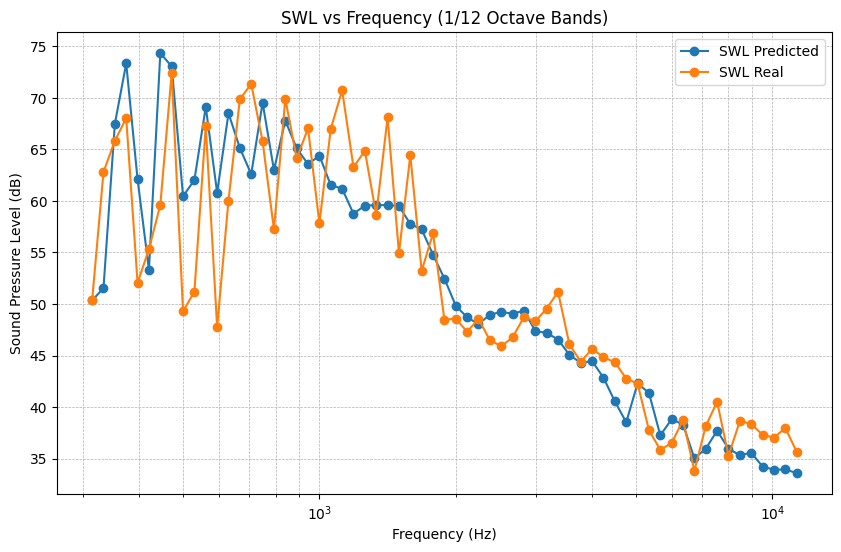

SWL Predicted Mean Loudness: 34.55 dB
SWL Real Mean Loudness: 34.50 dB


In [24]:
example_idx = 7

SWL_predicted = predicted_Lw_total[example_idx]
SWL_real = actual_Lw_total[example_idx]

plt.figure(figsize=(10, 6))
plt.semilogx(frequencies, SWL_predicted, marker='o', linestyle='-', label='SWL Predicted')
plt.semilogx(frequencies, SWL_real, marker='o', linestyle='-', label='SWL Real')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Sound Pressure Level (dB)')
plt.title('SWL vs Frequency (1/12 Octave Bands)')
plt.legend()
plt.show()

# Calculate the loudness for the predicted and real SWL
SWL_predicted_loudness_db = calculate_loudness(SWL_predicted)
SWL_real_loudness_db = calculate_loudness(SWL_real)

print(f"SWL Predicted Mean Loudness: {SWL_predicted_loudness_db:.2f} dB")
print(f"SWL Real Mean Loudness: {SWL_real_loudness_db:.2f} dB")

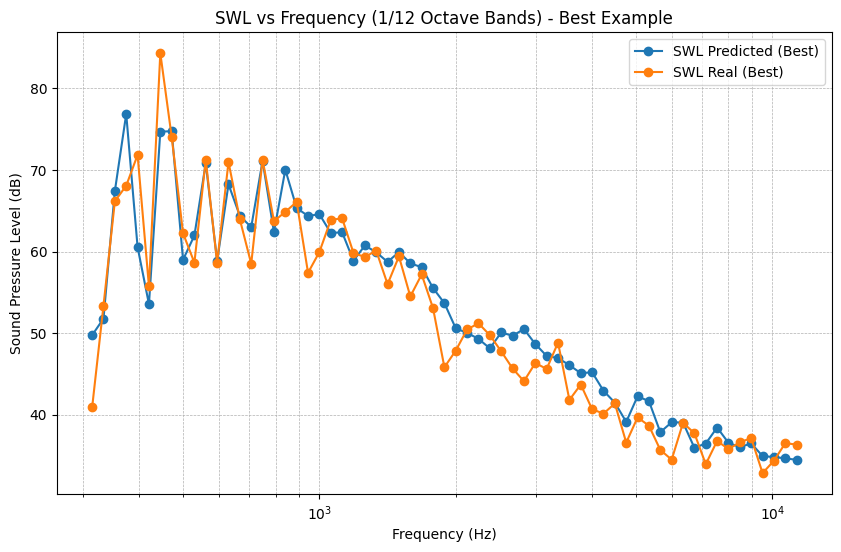

SWL Predicted Mean Loudness: 34.63 dB
SWL Real Mean Loudness: 34.48 dB
Best Example Input:
delta_zeta                                                  1.0
RPM1                                                   0.034732
RPM2                                                    0.89468
RPM3                                                   0.924999
RPM4                                                   0.128636
C_proc                                                      0.0
Lw_Ref        [58.06334401065169, 63.39435536470416, 89.6140...
Lws           [45.708379612479874, 50.75856200447226, 67.388...
Lw_Ref_mag                                           518.359156
Lws_mag                                              394.808234
Name: 203, dtype: object


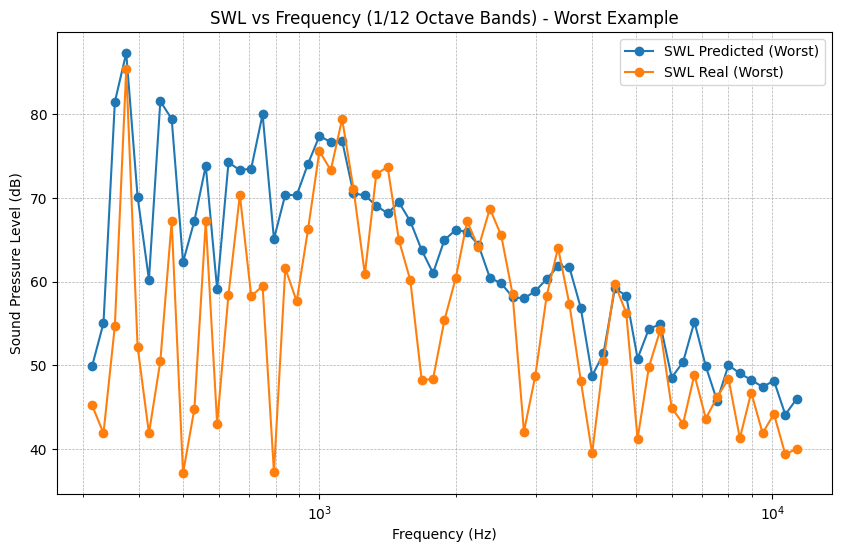

SWL Predicted Mean Loudness: 36.04 dB
SWL Real Mean Loudness: 35.00 dB

Worst Example Input:
delta_zeta                                                  0.0
RPM1                                                   0.122045
RPM2                                                   0.800678
RPM3                                                        1.0
RPM4                                                   0.051461
C_proc                                                      0.0
Lw_Ref        [58.06334401065169, 63.39435536470416, 89.6140...
Lws           [51.69107386422381, 54.13990899202041, 70.6138...
Lw_Ref_mag                                           518.359156
Lws_mag                                              485.813476
Name: 117, dtype: object


In [23]:
# Calculate the errors for each example in the test set
errors = np.mean(np.abs((actual_Lw_total - predicted_Lw_total)) / actual_Lw_total, axis=1)

# Find the indices of the best and worst examples
best_example_idx = np.argmin(errors)
worst_example_idx = np.argmax(errors)

# Plot the best example
SWL_predicted_best = predicted_Lw_total[best_example_idx]
SWL_real_best = actual_Lw_total[best_example_idx]

plt.figure(figsize=(10, 6))
plt.semilogx(frequencies, SWL_predicted_best, marker='o', linestyle='-', label='SWL Predicted (Best)')
plt.semilogx(frequencies, SWL_real_best, marker='o', linestyle='-', label='SWL Real (Best)')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Sound Pressure Level (dB)')
plt.title('SWL vs Frequency (1/12 Octave Bands) - Best Example')
plt.legend()
plt.savefig("best_example.png")
plt.show()


# Calculate the loudness for the predicted and real SWL
SWL_predicted_loudness_db = calculate_loudness(SWL_predicted_best)
SWL_real_loudness_db = calculate_loudness(SWL_real_best)

print(f"SWL Predicted Mean Loudness: {SWL_predicted_loudness_db:.2f} dB")
print(f"SWL Real Mean Loudness: {SWL_real_loudness_db:.2f} dB")

# Print the input information of the best example
print("Best Example Input:")
print(train_df.iloc[best_example_idx])

# Plot the worst example
SWL_predicted_worst = predicted_Lw_total[worst_example_idx]
SWL_real_worst = actual_Lw_total[worst_example_idx]

plt.figure(figsize=(10, 6))
plt.semilogx(frequencies, SWL_predicted_worst, marker='o', linestyle='-', label='SWL Predicted (Worst)')
plt.semilogx(frequencies, SWL_real_worst, marker='o', linestyle='-', label='SWL Real (Worst)')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Sound Pressure Level (dB)')
plt.title('SWL vs Frequency (1/12 Octave Bands) - Worst Example')
plt.legend()
plt.savefig("worst_example.png")
plt.show()

# Calculate the loudness for the predicted and real SWL
SWL_predicted_loudness_db = calculate_loudness(SWL_predicted_worst)
SWL_real_loudness_db = calculate_loudness(SWL_real_worst)

print(f"SWL Predicted Mean Loudness: {SWL_predicted_loudness_db:.2f} dB")
print(f"SWL Real Mean Loudness: {SWL_real_loudness_db:.2f} dB")

# Print the input information of the worst example
print("\nWorst Example Input:")
print(train_df.iloc[worst_example_idx])
